# 0. Import Library

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import sklearn 
import datetime

# Import Data

In [6]:
loan = pd.read_csv('kiva_loans.csv')
loan.head()

,id,funded_amount,loan_amount,activity,sector,use,country_code,country,region,currency,partner_id,posted_time,disbursed_time,funded_time,term_in_months,lender_count,tags,borrower_genders,repayment_interval,date
0,653051,300.0,300.0,Fruits & Vegetables,Food,"To buy seasonal, fresh fruits to sell.",PK,Pakistan,Lahore,PKR,247.0,2014-01-01 06:12:39+00:00,2013-12-17 08:00:00+00:00,2014-01-02 10:06:32+00:00,12.0,12,NaN,female,irregular,2014-01-01
1,653053,575.0,575.0,Rickshaw,Transportation,to repair and maintain the auto rickshaw used ...,PK,Pakistan,Lahore,PKR,247.0,2014-01-01 06:51:08+00:00,2013-12-17 08:00:00+00:00,2014-01-02 09:17:23+00:00,11.0,14,NaN,"female, female",irregular,2014-01-01
2,653068,150.0,150.0,Transportation,Transportation,To repair their old cycle-van and buy another ...,IN,India,Maynaguri,INR,334.0,2014-01-01 09:58:07+00:00,2013-12-17 08:00:00+00:00,2014-01-01 16:01:36+00:00,43.0,6,"user_favorite, user_favorite",female,bullet,2014-01-01
3,653063,200.0,200.0,Embroidery,Arts,to purchase an embroidery machine and a variet...,PK,Pakistan,Lahore,PKR,247.0,2014-01-01 08:03:11+00:00,2013-12-24 08:00:00+00:00,2014-01-01 13:00:00+00:00,11.0,8,NaN,female,irregular,2014-01-01
4,653084,400.0,400.0,Milk Sales,Food,to purchase one buffalo.,PK,Pakistan,Abdul Hakeem,PKR,245.0,2014-01-01 11:53:19+00:00,2013-12-17 08:00:00+00:00,2014-01-01 19:18:51+00:00,14.0,16,NaN,female,monthly,2014-01-01


In [7]:
geolocation = pd.read_csv('kiva_mpi_region_locations.csv')
geolocation.head()

,LocationName,ISO,country,region,world_region,MPI,geo,lat,lon
0,"Badakhshan, Afghanistan",AFG,Afghanistan,Badakhshan,South Asia,0.387,"(36.7347725, 70.81199529999999)",36.734772,70.811995
1,"Badghis, Afghanistan",AFG,Afghanistan,Badghis,South Asia,0.466,"(35.1671339, 63.7695384)",35.167134,63.769538
2,"Baghlan, Afghanistan",AFG,Afghanistan,Baghlan,South Asia,0.300,"(35.8042947, 69.2877535)",35.804295,69.287754
3,"Balkh, Afghanistan",AFG,Afghanistan,Balkh,South Asia,0.301,"(36.7550603, 66.8975372)",36.755060,66.897537
4,"Bamyan, Afghanistan",AFG,Afghanistan,Bamyan,South Asia,0.325,"(34.8100067, 67.8212104)",34.810007,67.821210


In [8]:
theme = pd.read_csv('loan_theme_ids.csv')
theme.head()

,id,Loan Theme ID,Loan Theme Type,Partner ID
0,638631,a1050000000skGl,General,151.0
1,640322,a1050000000skGl,General,151.0
2,641006,a1050000002X1ij,Higher Education,160.0
3,641019,a1050000002X1ij,Higher Education,160.0
4,641594,a1050000002VbsW,Subsistence Agriculture,336.0


In [9]:
theme_location = pd.read_csv('loan_themes_by_region.csv')
theme_location.head()

,Partner ID,Field Partner Name,sector,Loan Theme ID,Loan Theme Type,country,forkiva,region,geocode_old,ISO,...,amount,LocationName,geocode,names,geo,lat,lon,mpi_region,mpi_geo,rural_pct
0,9,KREDIT Microfinance Institution,General Financial Inclusion,a1050000000slfi,Higher Education,Cambodia,No,Banteay Meanchey,"(13.75, 103.0)",KHM,...,450,"Banteay Meanchey, Cambodia","[(13.6672596, 102.8975098)]",Banteay Meanchey Province; Cambodia,"(13.6672596, 102.8975098)",13.667260,102.897510,"Banteay Mean Chey, Cambodia","(13.6672596, 102.8975098)",90.0
1,9,KREDIT Microfinance Institution,General Financial Inclusion,a10500000068jPe,Vulnerable Populations,Cambodia,No,Battambang Province,NaN,KHM,...,20275,"Battambang Province, Cambodia","[(13.0286971, 102.989615)]",Battambang Province; Cambodia,"(13.0286971, 102.989615)",13.028697,102.989615,"Banteay Mean Chey, Cambodia","(13.6672596, 102.8975098)",90.0
2,9,KREDIT Microfinance Institution,General Financial Inclusion,a1050000000slfi,Higher Education,Cambodia,No,Battambang Province,NaN,KHM,...,9150,"Battambang Province, Cambodia","[(13.0286971, 102.989615)]",Battambang Province; Cambodia,"(13.0286971, 102.989615)",13.028697,102.989615,"Banteay Mean Chey, Cambodia","(13.6672596, 102.8975098)",90.0
3,9,KREDIT Microfinance Institution,General Financial Inclusion,a10500000068jPe,Vulnerable Populations,Cambodia,No,Kampong Cham Province,"(12.0, 105.5)",KHM,...,604950,"Kampong Cham Province, Cambodia","[(12.0982918, 105.3131185)]",Kampong Cham Province; Cambodia,"(12.0982918, 105.3131185)",12.098292,105.313119,"Kampong Cham, Cambodia","(11.9924294, 105.4645408)",90.0
4,9,KREDIT Microfinance Institution,General Financial Inclusion,a1050000002X1Uu,Sanitation,Cambodia,No,Kampong Cham Province,"(12.0, 105.5)",KHM,...,275,"Kampong Cham Province, Cambodia","[(12.0982918, 105.3131185)]",Kampong Cham Province; Cambodia,"(12.0982918, 105.3131185)",12.098292,105.313119,"Kampong Cham, Cambodia","(11.9924294, 105.4645408)",90.0


In [10]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 671205 entries, 0 to 671204
Data columns (total 20 columns):
id                    671205 non-null int64
funded_amount         671205 non-null float64
loan_amount           671205 non-null float64
activity              671205 non-null object
sector                671205 non-null object
use                   666973 non-null object
country_code          671197 non-null object
country               671205 non-null object
region                614405 non-null object
currency              671205 non-null object
partner_id            657698 non-null float64
posted_time           671205 non-null object
disbursed_time        668809 non-null object
funded_time           622874 non-null object
term_in_months        671205 non-null float64
lender_count          671205 non-null int64
tags                  499789 non-null object
borrower_genders      666984 non-null object
repayment_interval    671205 non-null object
date                  671205 non

In [11]:
theme.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 779092 entries, 0 to 779091
Data columns (total 4 columns):
id                 779092 non-null int64
Loan Theme ID      764279 non-null object
Loan Theme Type    764279 non-null object
Partner ID         764279 non-null float64
dtypes: float64(1), int64(1), object(2)
memory usage: 23.8+ MB


In [12]:
geolocation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2772 entries, 0 to 2771
Data columns (total 9 columns):
LocationName    984 non-null object
ISO             1008 non-null object
country         1008 non-null object
region          984 non-null object
world_region    1008 non-null object
MPI             984 non-null float64
geo             2772 non-null object
lat             892 non-null float64
lon             892 non-null float64
dtypes: float64(3), object(6)
memory usage: 195.0+ KB


In [13]:
theme_location.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15736 entries, 0 to 15735
Data columns (total 21 columns):
Partner ID            15736 non-null int64
Field Partner Name    15736 non-null object
sector                15736 non-null object
Loan Theme ID         15736 non-null object
Loan Theme Type       15736 non-null object
country               15736 non-null object
forkiva               15736 non-null object
region                15736 non-null object
geocode_old           1200 non-null object
ISO                   15722 non-null object
number                15736 non-null int64
amount                15736 non-null int64
LocationName          15736 non-null object
geocode               13662 non-null object
names                 13661 non-null object
geo                   15736 non-null object
lat                   13662 non-null float64
lon                   13662 non-null float64
mpi_region            15722 non-null object
mpi_geo               9671 non-null object
rural_pct     

# 2. Data Relation Analysis

## 2.1 Column View

- Theme CSV:
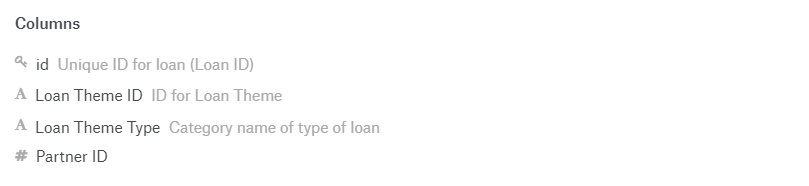

- Geolocation CSV
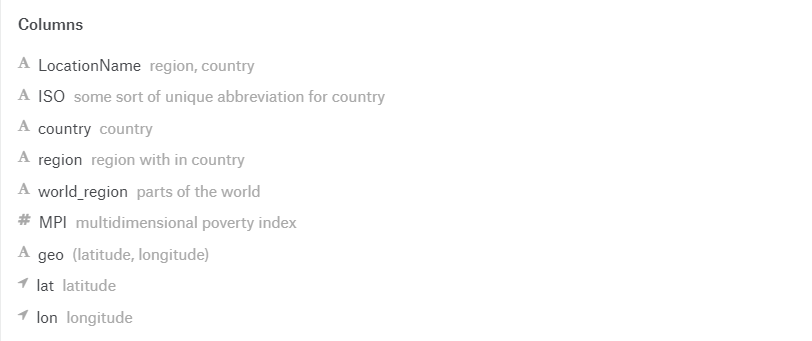

- Loan CSV: 
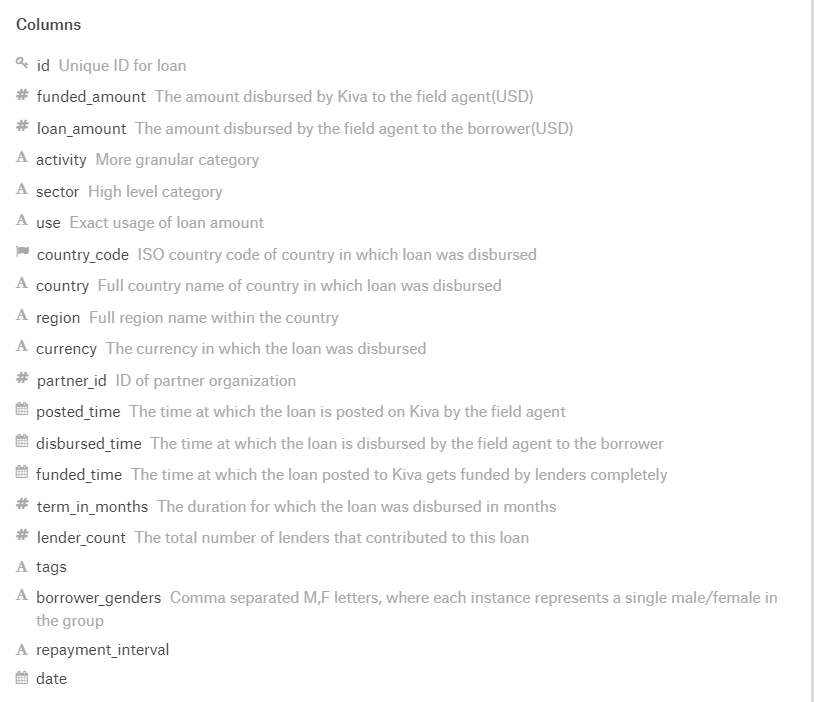

- Theme Location
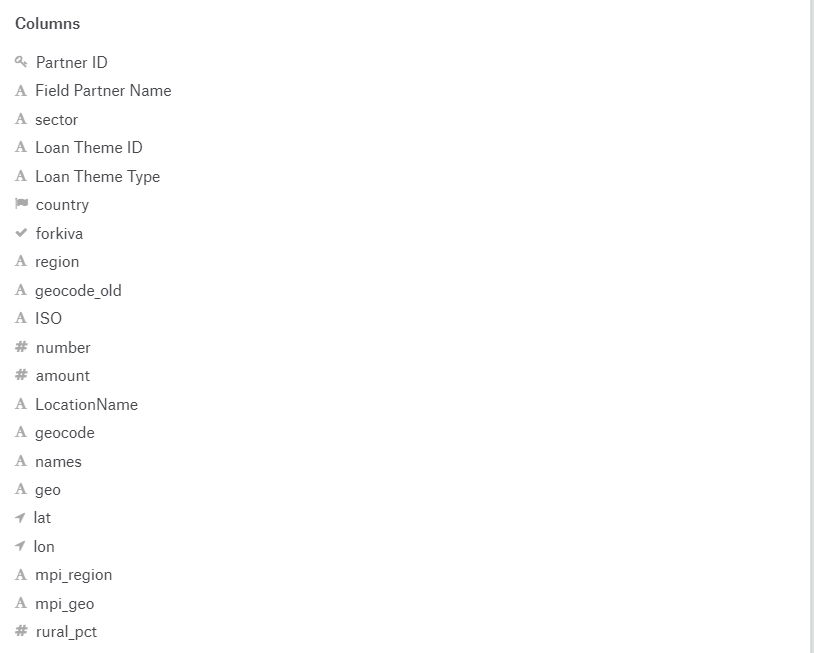

## 2.2 General Relationship

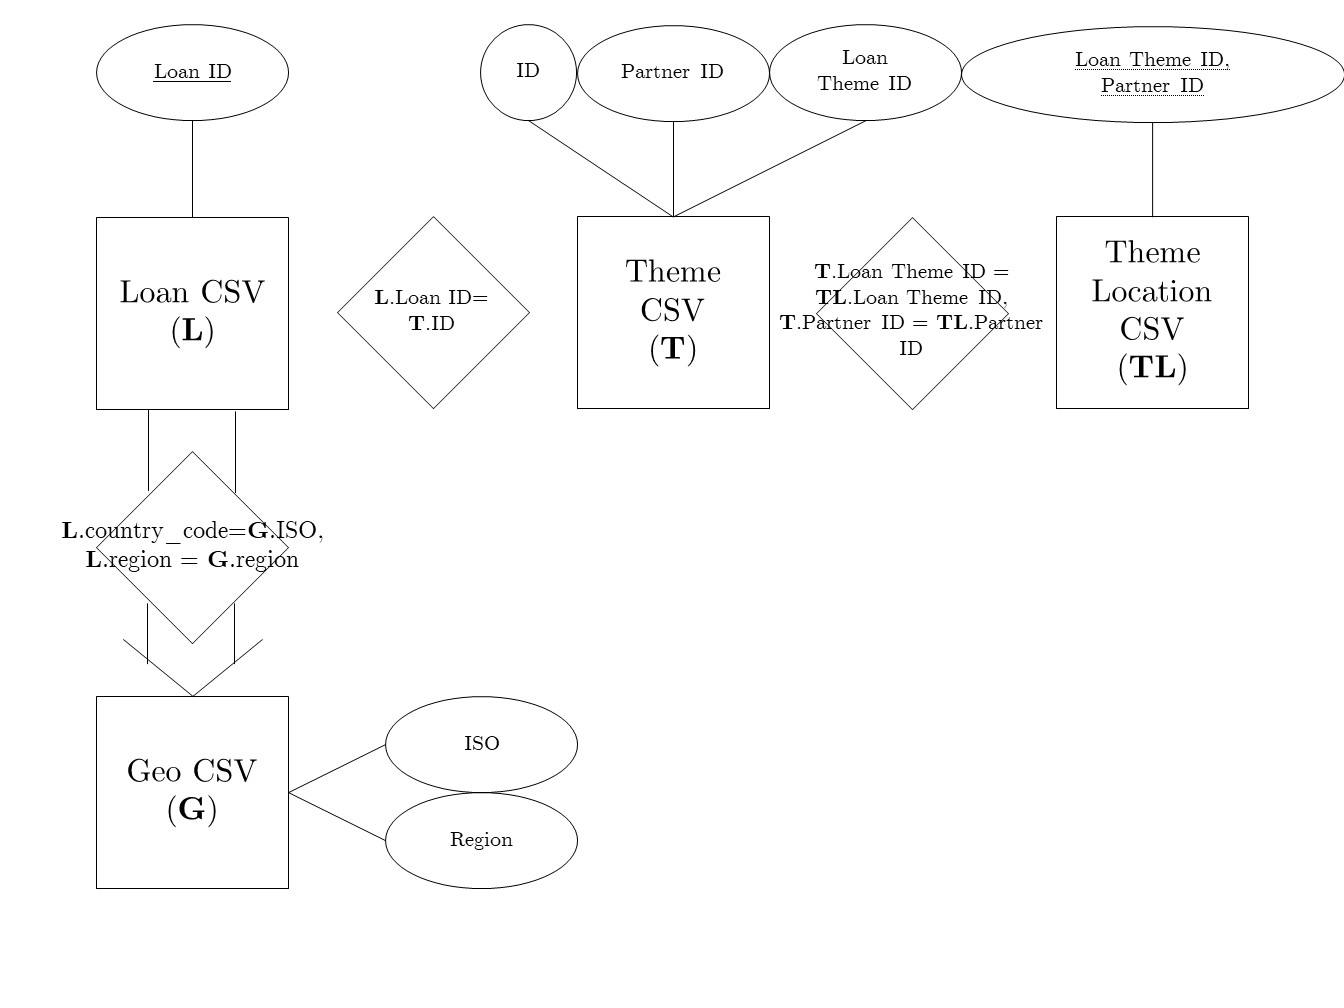

The ER diagram in above shows the interaction between the CSV files.  Loan is associated with Theme CSV, while Theme CSV associates with Theme Location CSV, giving more details about the loan.  Geo CSV indicates the exact location of the loan.  However, all CSV such as Theme CSV may not contains all Loan CSV loan ids, while same applies to the relationship between Theme CSV and Theme Location CSV, and Geolocation CSV and Loan CSV.  Some of the values are missing, such as Theme CSV Theme ID are not even found in the Theme Location CSV, and Loan country_code not found in Geolocation CSV.  Therefore, it is suggested that only a small subset of Loan contains the complete information of Theme and Partner, while all loan has access to the Geolocation.  

## 2.3 Method to find the records between CSV

In [14]:
loan.loc[loan['id'] == 657249]

,id,funded_amount,loan_amount,activity,sector,use,country_code,country,region,currency,partner_id,posted_time,disbursed_time,funded_time,term_in_months,lender_count,tags,borrower_genders,repayment_interval,date
4132,657249,1450.0,1450.0,Agriculture,Agriculture,to buy agricultural supplies for growing certi...,HN,Honduras,"La Esperanza, Intibuca",HNL,269.0,2014-01-14 18:56:09+00:00,2014-01-09 08:00:00+00:00,2014-02-27 00:07:38+00:00,20.0,58,"#Repeat Borrower, #Woman Owned Biz, #Fabrics",female,irregular,2014-01-14


In [15]:
theme.loc[theme['id'] == 657249]

,id,Loan Theme ID,Loan Theme Type,Partner ID
4582,657249,a1050000000tsXd,Agriculture,269.0


In [16]:
theme_location.loc[(theme_location['Partner ID'] == 269) & (theme_location['Loan Theme ID'] == 'a1050000000tsXd') ]

,Partner ID,Field Partner Name,sector,Loan Theme ID,Loan Theme Type,country,forkiva,region,geocode_old,ISO,...,amount,LocationName,geocode,names,geo,lat,lon,mpi_region,mpi_geo,rural_pct


In [17]:
geolocation.loc[(geolocation['ISO'] == 'HN') & (geolocation['region'] == 'La Esperanza, Intibuca')]

,LocationName,ISO,country,region,world_region,MPI,geo,lat,lon


# 3. Data Preprocessing

As for the prelimary analysis, only the easy, simple conversion is focused.  

## 3.1 Filter out incomplete data

In here, we extract a set of data that is has complete information as mentioned in 2.3.  They must contains:

- complete Theme ID 
- complete Partner Information
- complete Geolocation


In [18]:
df1 = pd.merge(loan,geolocation,how='inner')

In [19]:
df1.head()

,id,funded_amount,loan_amount,activity,sector,use,country_code,country,region,currency,...,borrower_genders,repayment_interval,date,LocationName,ISO,world_region,MPI,geo,lat,lon
0,653359,600.0,600.0,Machinery Rental,Services,to invest in working capital and to maintain g...,NI,Nicaragua,Leon,NIO,...,female,monthly,2014-01-02,"Leon, Nicaragua",NIC,Latin America and Caribbean,0.031,"(28.3998551, 83.6895693)",28.399855,83.689569
1,653373,1000.0,1000.0,Grocery Store,Food,to invest in working capital and to provide hi...,NI,Nicaragua,Leon,NIO,...,male,monthly,2014-01-02,"Leon, Nicaragua",NIC,Latin America and Caribbean,0.031,"(28.3998551, 83.6895693)",28.399855,83.689569
2,653364,250.0,250.0,Fuel/Firewood,Retail,to buy firewood to offer to her customers,NI,Nicaragua,Leon,NIO,...,female,monthly,2014-01-02,"Leon, Nicaragua",NIC,Latin America and Caribbean,0.031,"(28.3998551, 83.6895693)",28.399855,83.689569
3,653367,175.0,175.0,Food Market,Food,to invest in working capital and stock up her ...,NI,Nicaragua,Leon,NIO,...,female,monthly,2014-01-02,"Leon, Nicaragua",NIC,Latin America and Caribbean,0.031,"(28.3998551, 83.6895693)",28.399855,83.689569
4,653396,800.0,800.0,Clothing Sales,Clothing,to invest in working capital to stock their bu...,NI,Nicaragua,Leon,NIO,...,"female, female, female",monthly,2014-01-02,"Leon, Nicaragua",NIC,Latin America and Caribbean,0.031,"(28.3998551, 83.6895693)",28.399855,83.689569


In [20]:
df1.columns

Index(['id', 'funded_amount', 'loan_amount', 'activity', 'sector', 'use',
       'country_code', 'country', 'region', 'currency', 'partner_id',
       'posted_time', 'disbursed_time', 'funded_time', 'term_in_months',
       'lender_count', 'tags', 'borrower_genders', 'repayment_interval',
       'date', 'LocationName', 'ISO', 'world_region', 'MPI', 'geo', 'lat',
       'lon'],
      dtype='object')

In [21]:
df1 = pd.merge(df1,theme,how='inner')

In [22]:
df1.columns

Index(['id', 'funded_amount', 'loan_amount', 'activity', 'sector', 'use',
       'country_code', 'country', 'region', 'currency', 'partner_id',
       'posted_time', 'disbursed_time', 'funded_time', 'term_in_months',
       'lender_count', 'tags', 'borrower_genders', 'repayment_interval',
       'date', 'LocationName', 'ISO', 'world_region', 'MPI', 'geo', 'lat',
       'lon', 'Loan Theme ID', 'Loan Theme Type', 'Partner ID'],
      dtype='object')

In [23]:
df1.head()

,id,funded_amount,loan_amount,activity,sector,use,country_code,country,region,currency,...,LocationName,ISO,world_region,MPI,geo,lat,lon,Loan Theme ID,Loan Theme Type,Partner ID
0,653359,600.0,600.0,Machinery Rental,Services,to invest in working capital and to maintain g...,NI,Nicaragua,Leon,NIO,...,"Leon, Nicaragua",NIC,Latin America and Caribbean,0.031,"(28.3998551, 83.6895693)",28.399855,83.689569,a1050000000wf00,General,96.0
1,653373,1000.0,1000.0,Grocery Store,Food,to invest in working capital and to provide hi...,NI,Nicaragua,Leon,NIO,...,"Leon, Nicaragua",NIC,Latin America and Caribbean,0.031,"(28.3998551, 83.6895693)",28.399855,83.689569,a1050000000wf00,General,96.0
2,653364,250.0,250.0,Fuel/Firewood,Retail,to buy firewood to offer to her customers,NI,Nicaragua,Leon,NIO,...,"Leon, Nicaragua",NIC,Latin America and Caribbean,0.031,"(28.3998551, 83.6895693)",28.399855,83.689569,a1050000000wf00,General,96.0
3,653367,175.0,175.0,Food Market,Food,to invest in working capital and stock up her ...,NI,Nicaragua,Leon,NIO,...,"Leon, Nicaragua",NIC,Latin America and Caribbean,0.031,"(28.3998551, 83.6895693)",28.399855,83.689569,a1050000000wf00,General,96.0
4,653396,800.0,800.0,Clothing Sales,Clothing,to invest in working capital to stock their bu...,NI,Nicaragua,Leon,NIO,...,"Leon, Nicaragua",NIC,Latin America and Caribbean,0.031,"(28.3998551, 83.6895693)",28.399855,83.689569,a1050000000wf00,General,96.0


In [24]:
df1 = pd.merge(df1,theme_location,how='inner')

In [25]:
df1.columns

Index(['id', 'funded_amount', 'loan_amount', 'activity', 'sector', 'use',
       'country_code', 'country', 'region', 'currency', 'partner_id',
       'posted_time', 'disbursed_time', 'funded_time', 'term_in_months',
       'lender_count', 'tags', 'borrower_genders', 'repayment_interval',
       'date', 'LocationName', 'ISO', 'world_region', 'MPI', 'geo', 'lat',
       'lon', 'Loan Theme ID', 'Loan Theme Type', 'Partner ID',
       'Field Partner Name', 'forkiva', 'geocode_old', 'number', 'amount',
       'geocode', 'names', 'mpi_region', 'mpi_geo', 'rural_pct'],
      dtype='object')

In [26]:
df1.head()

,id,funded_amount,loan_amount,activity,sector,use,country_code,country,region,currency,...,Field Partner Name,forkiva,geocode_old,number,amount,geocode,names,mpi_region,mpi_geo,rural_pct
0,773240,725.0,725.0,Higher education costs,Education,To pay for university tuition fees and cost of...,KH,Cambodia,Phnom Penh,USD,...,Wedu,No,"(11.55, 104.9166667)",3,7200,"[(11.5448729, 104.8921668)]",Phnom Penh; Phnom Penh; Cambodia,"Phnom Penh, Cambodia","(11.5448729, 104.8921668)",NaN
1,773242,1000.0,1000.0,Higher education costs,Education,To pay for university fees and cost of living ...,KH,Cambodia,Phnom Penh,USD,...,Wedu,No,"(11.55, 104.9166667)",3,7200,"[(11.5448729, 104.8921668)]",Phnom Penh; Phnom Penh; Cambodia,"Phnom Penh, Cambodia","(11.5448729, 104.8921668)",NaN
2,1035120,2000.0,2000.0,Higher education costs,Education,To pay for university fees and cost of living ...,KH,Cambodia,Phnom Penh,USD,...,Wedu,No,"(11.55, 104.9166667)",3,7200,"[(11.5448729, 104.8921668)]",Phnom Penh; Phnom Penh; Cambodia,"Phnom Penh, Cambodia","(11.5448729, 104.8921668)",NaN
3,1151588,1600.0,1600.0,Higher education costs,Education,To pay the fees and expenses for her Master's ...,KH,Cambodia,Phnom Penh,USD,...,Wedu,No,"(11.55, 104.9166667)",3,7200,"[(11.5448729, 104.8921668)]",Phnom Penh; Phnom Penh; Cambodia,"Phnom Penh, Cambodia","(11.5448729, 104.8921668)",NaN
4,1210828,3600.0,3600.0,Higher education costs,Education,"To pay for housing and living costs, to cover ...",KH,Cambodia,Phnom Penh,USD,...,Wedu,No,"(11.55, 104.9166667)",3,7200,"[(11.5448729, 104.8921668)]",Phnom Penh; Phnom Penh; Cambodia,"Phnom Penh, Cambodia","(11.5448729, 104.8921668)",NaN


## 3.2 One-hot encoding

In order to get rid of the non-numeric features, one-hot encoding is necessary.  However, there are too many options, resulting a sparse matrix.  In current stage, only selected features are processed.  They are:
- `repayment_interval`
- `ISO`
- `Loan Theme Type` (*note that loan theme type and loan theme id are different*)
- `Gender` (*In case of more than one applicant, we choose mix*)
- `Number of applicant` (*extracted by counting the number of applicats in `gender`*)
- `Currency`

For the other attributes, they will not be preserved otherwise selected. 

- `id`
- `funded_amount`
- `loan_amount`
- `currency`
- `term_in_months`
- `lender_count`
- `borrower_genders`
- `repayment_interval`
- `ISO`
- `Loan Theme Type`
- `number`
- `amount`


These attributes will add into consideration in future:
- `posted_time`
- `disbursed_time`
- `funded_time`
- `date`

In [27]:
df2 = df1[['id','funded_amount','loan_amount','currency','term_in_months','lender_count','borrower_genders','repayment_interval','ISO','Loan Theme Type','number','amount']]
df2.columns

Index(['id', 'funded_amount', 'loan_amount', 'currency', 'term_in_months',
       'lender_count', 'borrower_genders', 'repayment_interval', 'ISO',
       'Loan Theme Type', 'number', 'amount'],
      dtype='object')

In [28]:
df2.head()

,id,funded_amount,loan_amount,currency,term_in_months,lender_count,borrower_genders,repayment_interval,ISO,Loan Theme Type,number,amount
0,773240,725.0,725.0,USD,38.0,29,female,bullet,KHM,Human Capital Contracts,3,7200
1,773242,1000.0,1000.0,USD,101.0,21,female,bullet,KHM,Human Capital Contracts,3,7200
2,1035120,2000.0,2000.0,USD,120.0,46,female,bullet,KHM,Human Capital Contracts,3,7200
3,1151588,1600.0,1600.0,USD,72.0,55,female,bullet,KHM,Human Capital Contracts,3,7200
4,1210828,3600.0,3600.0,USD,110.0,122,female,bullet,KHM,Human Capital Contracts,3,7200


In [29]:
# print(df2.iloc[0]['funded_time'][:-6])
# print(datetime.datetime.strptime(df2.iloc[0]['funded_time'][:-6], '%Y-%m-%d %H:%M:%S'))

In [30]:
choices = set(df2['repayment_interval'])
df3 = df2
for each in choices:
    dummy = pd.DataFrame({
        each:[1 if row['repayment_interval']==each else 0 for index, row in df3.iterrows()]
    })
    df3 = df3.join(dummy)
df3 = df3.drop('repayment_interval', axis=1)

In [31]:
df3.head()

,id,funded_amount,loan_amount,currency,term_in_months,lender_count,borrower_genders,ISO,Loan Theme Type,number,amount,monthly,bullet,irregular
0,773240,725.0,725.0,USD,38.0,29,female,KHM,Human Capital Contracts,3,7200,0,1,0
1,773242,1000.0,1000.0,USD,101.0,21,female,KHM,Human Capital Contracts,3,7200,0,1,0
2,1035120,2000.0,2000.0,USD,120.0,46,female,KHM,Human Capital Contracts,3,7200,0,1,0
3,1151588,1600.0,1600.0,USD,72.0,55,female,KHM,Human Capital Contracts,3,7200,0,1,0
4,1210828,3600.0,3600.0,USD,110.0,122,female,KHM,Human Capital Contracts,3,7200,0,1,0


In [32]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6718 entries, 0 to 6717
Data columns (total 14 columns):
id                  6718 non-null int64
funded_amount       6718 non-null float64
loan_amount         6718 non-null float64
currency            6718 non-null object
term_in_months      6718 non-null float64
lender_count        6718 non-null int64
borrower_genders    6718 non-null object
ISO                 6718 non-null object
Loan Theme Type     6718 non-null object
number              6718 non-null int64
amount              6718 non-null int64
monthly             6718 non-null int64
bullet              6718 non-null int64
irregular           6718 non-null int64
dtypes: float64(3), int64(7), object(4)
memory usage: 1.1+ MB


In [33]:
choices = set(df3['currency'])
print(choices)
df4 = df3
for each in choices:
    dummy = pd.DataFrame({
        each:[1 if row['currency']==each else 0 for index, row in df4.iterrows()]
    })
    df4 = df4.join(dummy)
df4 = df4.drop('currency', axis=1)

{'KES', 'USD', 'PEN', 'NIO', 'ZMW', 'NGN', 'IDR'}


In [34]:
df4.tail()

,id,funded_amount,loan_amount,term_in_months,lender_count,borrower_genders,ISO,Loan Theme Type,number,amount,monthly,bullet,irregular,KES,USD,PEN,NIO,ZMW,NGN,IDR
6713,1217745,1925.0,1925.0,8.0,66,"male, male, male, male",NIC,Agriculture,309,90950,0,1,0,0,0,0,1,0,0,0
6714,1218818,1225.0,1225.0,10.0,43,"male, male, female",NIC,Agriculture,309,90950,0,1,0,0,0,0,1,0,0,0
6715,1252366,1375.0,1375.0,10.0,31,"female, female, female",NIC,Agriculture,309,90950,0,1,0,0,0,0,1,0,0,0
6716,1324972,875.0,875.0,9.0,33,"female, male, female, female",NIC,Agriculture,309,90950,0,1,0,0,0,0,1,0,0,0
6717,1300428,5050.0,5050.0,50.0,147,female,PER,Higher Education,1,5050,0,1,0,0,1,0,0,0,0,0


In [35]:
df4.columns

Index(['id', 'funded_amount', 'loan_amount', 'term_in_months', 'lender_count',
       'borrower_genders', 'ISO', 'Loan Theme Type', 'number', 'amount',
       'monthly', 'bullet', 'irregular', 'KES', 'USD', 'PEN', 'NIO', 'ZMW',
       'NGN', 'IDR'],
      dtype='object')

In [36]:
choices = set(df4['Loan Theme Type'])
print(choices)
df5 = df4
for each in choices:
    dummy = pd.DataFrame({
        each:[1 if row['Loan Theme Type']==each else 0 for index, row in df5.iterrows()]
    })
    df5 = df5.join(dummy)
df5 = df5.drop('Loan Theme Type', axis=1)

{'Bridge/Income Smoothing', 'Full Tuition', 'Cacao Field Renewal', 'Agriculture', 'Value Chain', 'Education Technology', 'Human Capital Contracts', 'Field Renewal', 'Higher Education', 'Coffee Production', 'Cacao Production', 'Agricultural Infrastructure'}


In [37]:
df5.columns

Index(['id', 'funded_amount', 'loan_amount', 'term_in_months', 'lender_count',
       'borrower_genders', 'ISO', 'number', 'amount', 'monthly', 'bullet',
       'irregular', 'KES', 'USD', 'PEN', 'NIO', 'ZMW', 'NGN', 'IDR',
       'Bridge/Income Smoothing', 'Full Tuition', 'Cacao Field Renewal',
       'Agriculture', 'Value Chain', 'Education Technology',
       'Human Capital Contracts', 'Field Renewal', 'Higher Education',
       'Coffee Production', 'Cacao Production', 'Agricultural Infrastructure'],
      dtype='object')

In [38]:
df5.head()

,id,funded_amount,loan_amount,term_in_months,lender_count,borrower_genders,ISO,number,amount,monthly,...,Cacao Field Renewal,Agriculture,Value Chain,Education Technology,Human Capital Contracts,Field Renewal,Higher Education,Coffee Production,Cacao Production,Agricultural Infrastructure
0,773240,725.0,725.0,38.0,29,female,KHM,3,7200,0,...,0,0,0,0,1,0,0,0,0,0
1,773242,1000.0,1000.0,101.0,21,female,KHM,3,7200,0,...,0,0,0,0,1,0,0,0,0,0
2,1035120,2000.0,2000.0,120.0,46,female,KHM,3,7200,0,...,0,0,0,0,1,0,0,0,0,0
3,1151588,1600.0,1600.0,72.0,55,female,KHM,3,7200,0,...,0,0,0,0,1,0,0,0,0,0
4,1210828,3600.0,3600.0,110.0,122,female,KHM,3,7200,0,...,0,0,0,0,1,0,0,0,0,0


In [39]:
choices = set(df5['ISO'])
print(choices)
df6 = df5
for each in choices:
    dummy = pd.DataFrame({
        each:[1 if row['ISO']==each else 0 for index, row in df6.iterrows()]
    })
    df6 = df6.join(dummy)
df6 = df6.drop('ISO', axis=1)

{'KEN', 'IDN', 'PER', 'ZMB', 'NGA', 'KHM', 'NIC'}


In [40]:
df6.columns

Index(['id', 'funded_amount', 'loan_amount', 'term_in_months', 'lender_count',
       'borrower_genders', 'number', 'amount', 'monthly', 'bullet',
       'irregular', 'KES', 'USD', 'PEN', 'NIO', 'ZMW', 'NGN', 'IDR',
       'Bridge/Income Smoothing', 'Full Tuition', 'Cacao Field Renewal',
       'Agriculture', 'Value Chain', 'Education Technology',
       'Human Capital Contracts', 'Field Renewal', 'Higher Education',
       'Coffee Production', 'Cacao Production', 'Agricultural Infrastructure',
       'KEN', 'IDN', 'PER', 'ZMB', 'NGA', 'KHM', 'NIC'],
      dtype='object')

In [41]:
df6.tail()

,id,funded_amount,loan_amount,term_in_months,lender_count,borrower_genders,number,amount,monthly,bullet,...,Coffee Production,Cacao Production,Agricultural Infrastructure,KEN,IDN,PER,ZMB,NGA,KHM,NIC
6713,1217745,1925.0,1925.0,8.0,66,"male, male, male, male",309,90950,0,1,...,0,0,0,0,0,0,0,0,0,1
6714,1218818,1225.0,1225.0,10.0,43,"male, male, female",309,90950,0,1,...,0,0,0,0,0,0,0,0,0,1
6715,1252366,1375.0,1375.0,10.0,31,"female, female, female",309,90950,0,1,...,0,0,0,0,0,0,0,0,0,1
6716,1324972,875.0,875.0,9.0,33,"female, male, female, female",309,90950,0,1,...,0,0,0,0,0,0,0,0,0,1
6717,1300428,5050.0,5050.0,50.0,147,female,1,5050,0,1,...,0,0,0,0,0,1,0,0,0,0


In [42]:
string = df6.iloc[6716]['borrower_genders']
gender_list = string.split(', ')
print(gender_list)
print(len(gender_list))
print('female' in gender_list)
print('female' in string)

['female', 'male', 'female', 'female']
4
True
True


In [43]:
string = df6.iloc[6717]['borrower_genders']
gender_list = string.split(', ')
print(gender_list)
print(len(gender_list))
print('female' in gender_list)
print('female' in string)
print('male' in string)
print('male' in gender_list)

['female']
1
True
True
True
False


In [87]:
df7 = df6
dummy = pd.DataFrame({
    'no_of_borrowers':[len(row['borrower_genders'].split(', ')) for index, row in df7.iterrows()],
    'has_female':[1 if 'female' in row['borrower_genders'].split(', ') else 0 for index, row in df7.iterrows()],
    'has_male':[1 if 'male' in row['borrower_genders'].split(', ') else 0 for index, row in df7.iterrows()],   
})
df7 = df7.join(dummy)
df7 = df7.drop('borrower_genders', axis=1)

In [88]:
df7.tail()

,id,funded_amount,loan_amount,term_in_months,lender_count,number,amount,monthly,bullet,irregular,...,KEN,IDN,PER,ZMB,NGA,KHM,NIC,no_of_borrowers,has_female,has_male
6713,1217745,1925.0,1925.0,8.0,66,309,90950,0,1,0,...,0,0,0,0,0,0,1,4,0,1
6714,1218818,1225.0,1225.0,10.0,43,309,90950,0,1,0,...,0,0,0,0,0,0,1,3,1,1
6715,1252366,1375.0,1375.0,10.0,31,309,90950,0,1,0,...,0,0,0,0,0,0,1,3,1,0
6716,1324972,875.0,875.0,9.0,33,309,90950,0,1,0,...,0,0,0,0,0,0,1,4,1,1
6717,1300428,5050.0,5050.0,50.0,147,1,5050,0,1,0,...,0,0,1,0,0,0,0,1,1,0


## 3.3 Short Review

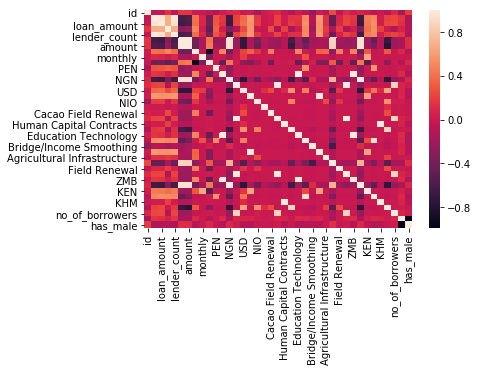

In [47]:
sns.heatmap(df7.corr())

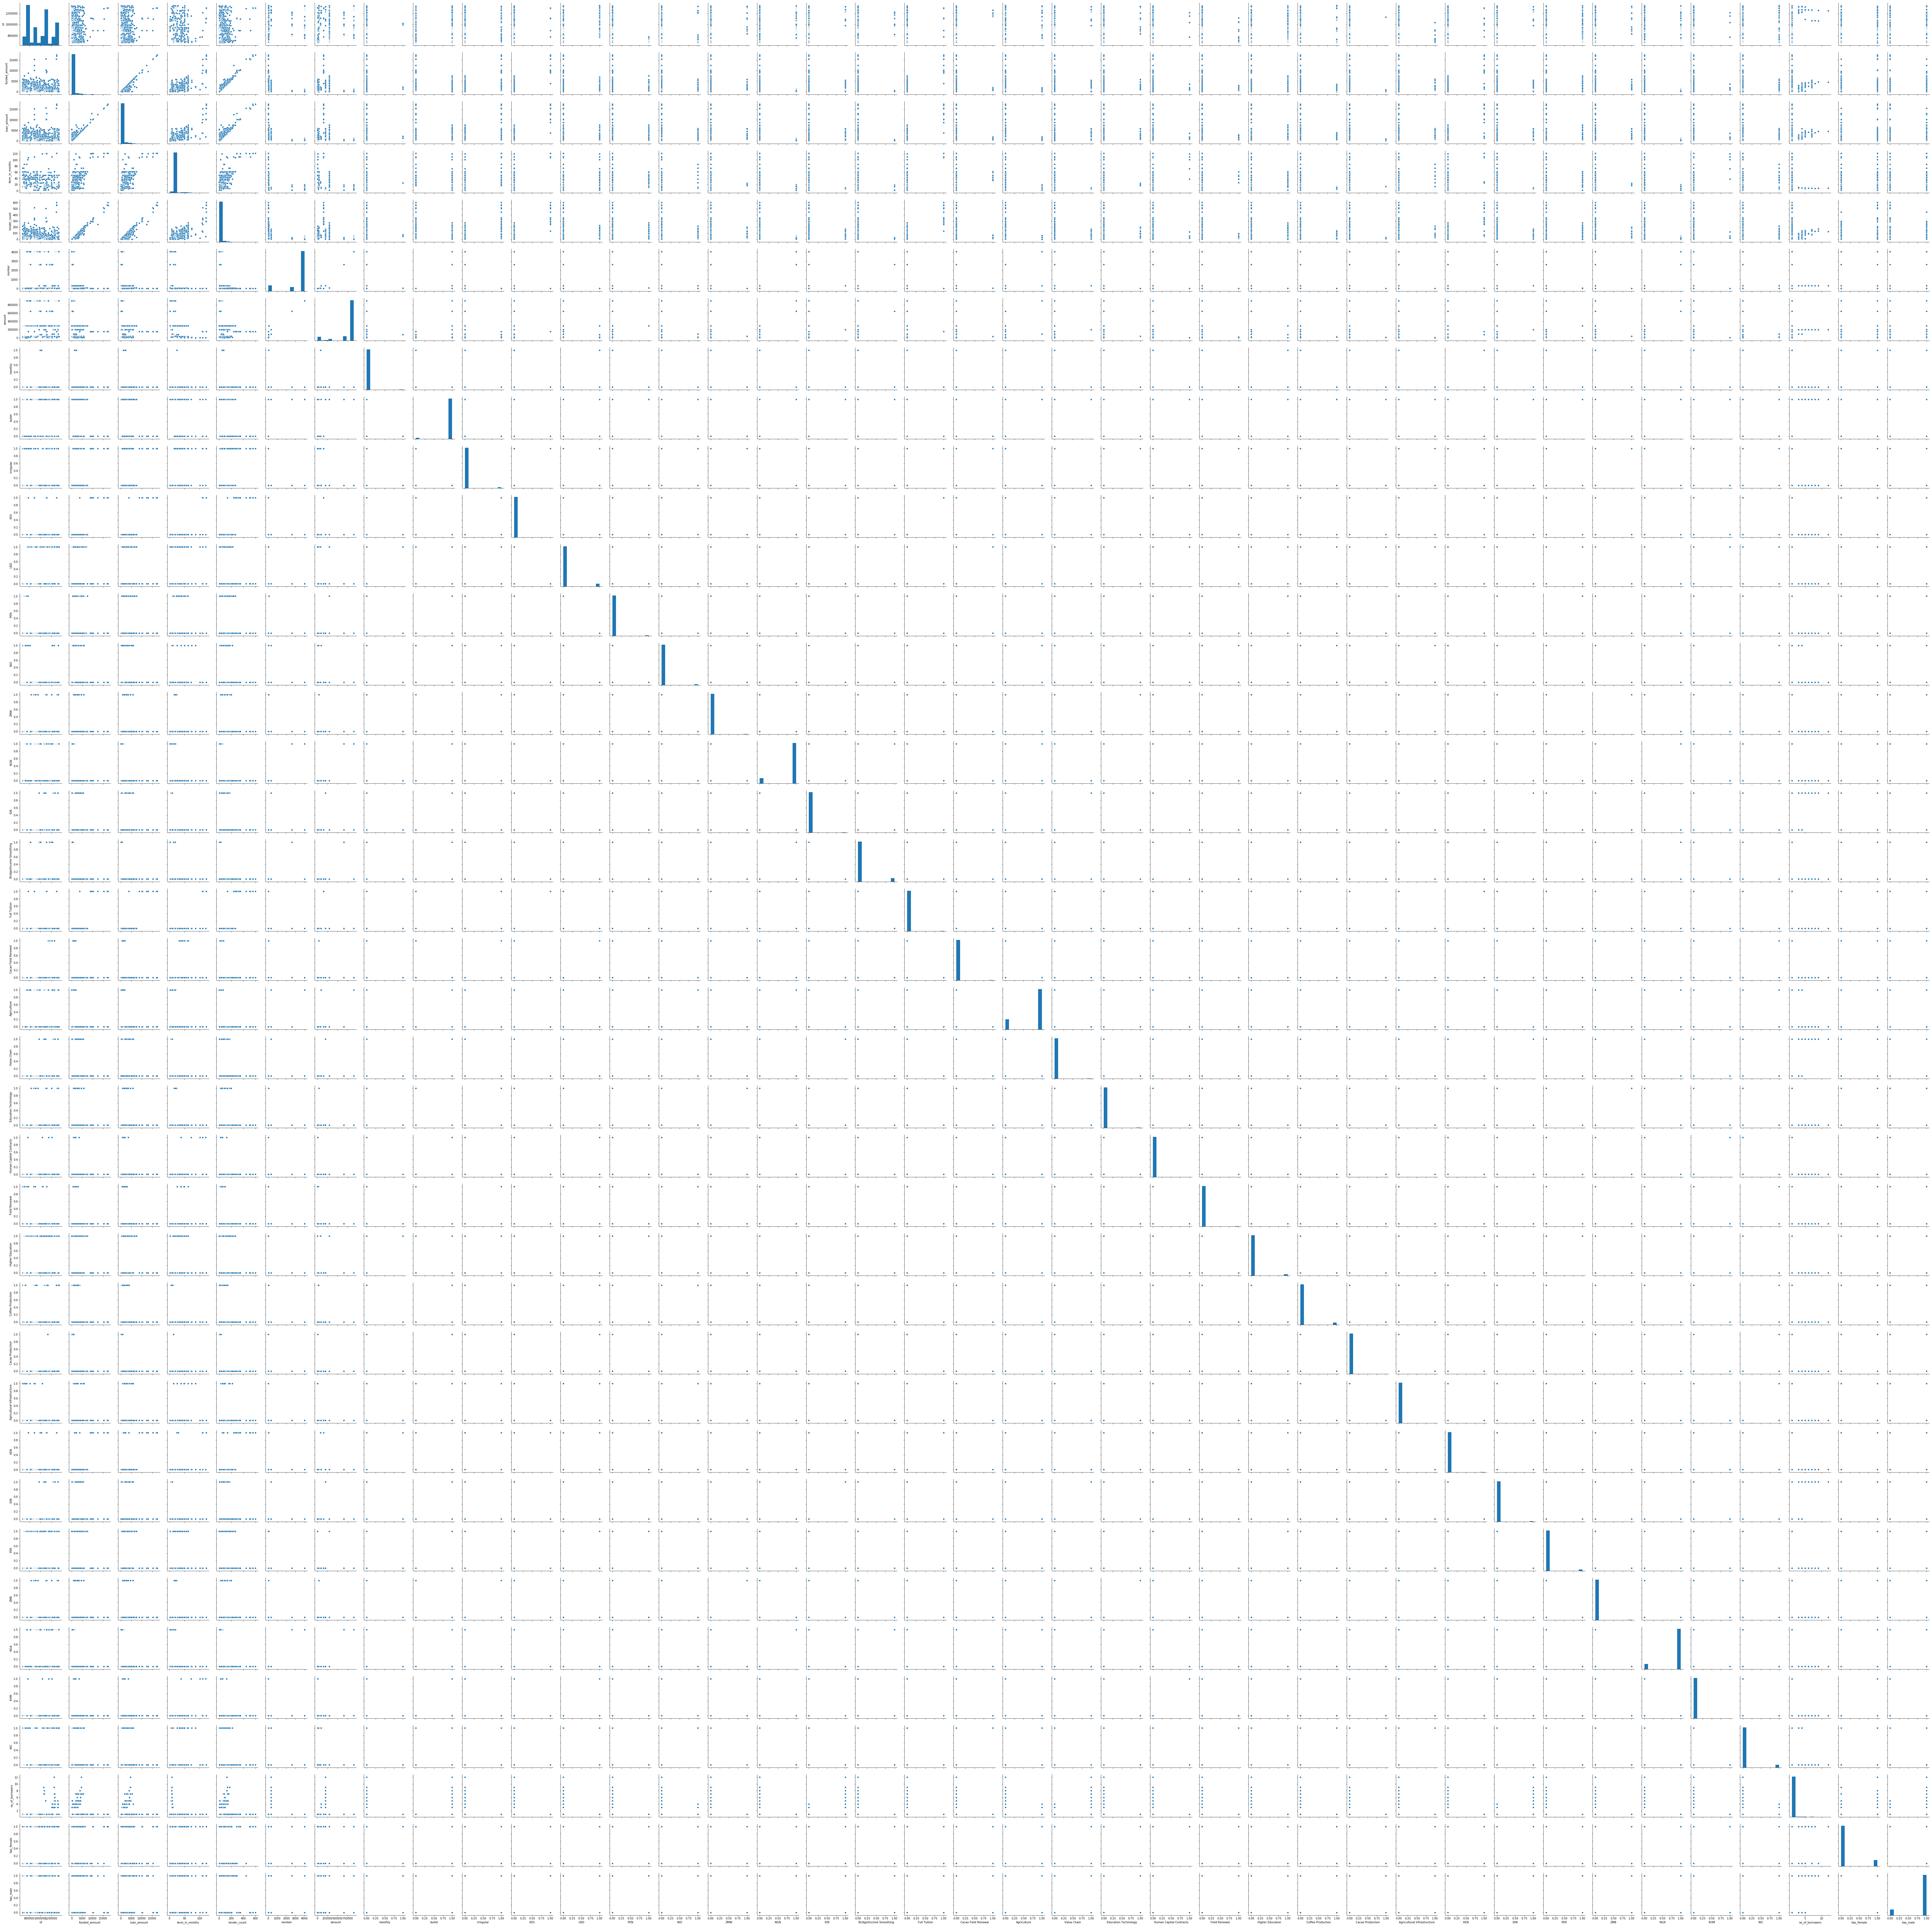

In [46]:
sns.pairplot(df7)

# 4. Classification

In here, this is just a simple exploration of dataset using logistic regression.  A simple standarization is preprocessed before test.  

In [132]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix

In [116]:
df8 = df7
df8[:] = scaler.fit_transform(df7[:])
df8.head()

,id,funded_amount,loan_amount,term_in_months,lender_count,number,amount,monthly,bullet,irregular,...,KEN,IDN,PER,ZMB,NGA,KHM,NIC,no_of_borrowers,has_female,has_male
0,0.143791,0.041429,0.040057,0.300000,0.048013,0.000495,0.005746,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,0.143794,0.057143,0.055794,0.825000,0.034768,0.000495,0.005746,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,0.540396,0.114286,0.113019,0.983333,0.076159,0.000495,0.005746,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,0.716781,0.091429,0.090129,0.583333,0.091060,0.000495,0.005746,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,0.806497,0.205714,0.204578,0.900000,0.201987,0.000495,0.005746,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [117]:
df8.columns

Index(['id', 'funded_amount', 'loan_amount', 'term_in_months', 'lender_count',
       'number', 'amount', 'monthly', 'bullet', 'irregular', 'KES', 'USD',
       'PEN', 'NIO', 'ZMW', 'NGN', 'IDR', 'Bridge/Income Smoothing',
       'Full Tuition', 'Cacao Field Renewal', 'Agriculture', 'Value Chain',
       'Education Technology', 'Human Capital Contracts', 'Field Renewal',
       'Higher Education', 'Coffee Production', 'Cacao Production',
       'Agricultural Infrastructure', 'KEN', 'IDN', 'PER', 'ZMB', 'NGA', 'KHM',
       'NIC', 'no_of_borrowers', 'has_female', 'has_male'],
      dtype='object')

## 4.1 Classification on `bullet`

In [138]:
y = df8['bullet']
X = df8.loc[:, (df7.columns != 'monthly') & (df8.columns != 'irregular') & (df8.columns != 'bullet')]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [139]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [140]:
X_train.columns

Index(['id', 'funded_amount', 'loan_amount', 'term_in_months', 'lender_count',
       'number', 'amount', 'KES', 'USD', 'PEN', 'NIO', 'ZMW', 'NGN', 'IDR',
       'Bridge/Income Smoothing', 'Full Tuition', 'Cacao Field Renewal',
       'Agriculture', 'Value Chain', 'Education Technology',
       'Human Capital Contracts', 'Field Renewal', 'Higher Education',
       'Coffee Production', 'Cacao Production', 'Agricultural Infrastructure',
       'KEN', 'IDN', 'PER', 'ZMB', 'NGA', 'KHM', 'NIC', 'no_of_borrowers',
       'has_female', 'has_male'],
      dtype='object')

In [141]:
y_train.head()

6074    1.0
1222    1.0
3815    1.0
4035    1.0
5605    1.0
Name: bullet, dtype: float64

In [142]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

c:\program files\python37\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [143]:
predictions = logmodel.predict(X_test)
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        52
         1.0       1.00      1.00      1.00      2165

   micro avg       1.00      1.00      1.00      2217
   macro avg       1.00      1.00      1.00      2217
weighted avg       1.00      1.00      1.00      2217



In [144]:
print(confusion_matrix(y_test, predictions))

[[  52    0]
 [   0 2165]]


## 4.2 Classification on `monthly`

In [145]:
y = df8['monthly']
X = df8.loc[:, (df8.columns != 'bullet') & (df8.columns != 'monthly') & (df8.columns != 'irregular')]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [146]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

c:\program files\python37\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [147]:
predictions = logmodel.predict(X_test)
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      2209
         1.0       1.00      1.00      1.00         8

   micro avg       1.00      1.00      1.00      2217
   macro avg       1.00      1.00      1.00      2217
weighted avg       1.00      1.00      1.00      2217



In [148]:
print(confusion_matrix(y_test, predictions))

[[2209    0]
 [   0    8]]


## 4.3 Classification on `irregular`

In [149]:
y = df8['irregular']
X = df8.loc[:, (df8.columns != 'bullet') & (df8.columns != 'monthly') & (df8.columns != 'irregular')]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [150]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

c:\program files\python37\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [151]:
predictions = logmodel.predict(X_test)
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      2173
         1.0       1.00      0.95      0.98        44

   micro avg       1.00      1.00      1.00      2217
   macro avg       1.00      0.98      0.99      2217
weighted avg       1.00      1.00      1.00      2217



In [152]:
print(confusion_matrix(y_test, predictions))

[[2173    0]
 [   2   42]]


## 4.4 Experimental Result

However, the result is excellent; most prediction achieves over 95% accuracy, in any indicators (F1, recall, support, etc. ).    

# 5. Future Work

In future, more work should be done on exploring the accuracy of the result.  There are three key areas to work with: 

- **Explore full dataset**

This notebook only explores the range of dataset which contains all the information.  Outside the selected data, there are lots of cases that do not have complete information.  To handle this, substitution is required such as replacing missing values with average or discarding the data.  The lost of information also hinder the prediction result, as not all the features are available for each data.  

- **Try different prediction model**

In this notebook, only logistic regression is used.  Thus, a more complete view is to try SVM, Decision Tree and LDA.  Similar procedure can be referenced in the above work.  

- **Feature Extraction**

Even this notebook has selected a small range of dataset, the dataset is already a sparse matrix.  Most of the cell values are 0.  To have better prediction, feature extraction such as best subset selection or Lasso should be used.  